### SVM 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB
None

[0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0

C:\Users\chand\AppData\Local\Temp\ipykernel_10504\1695011247.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inp=data.drop(['User ID','Purchased'],'columns')


<IPython.core.display.Javascript object>


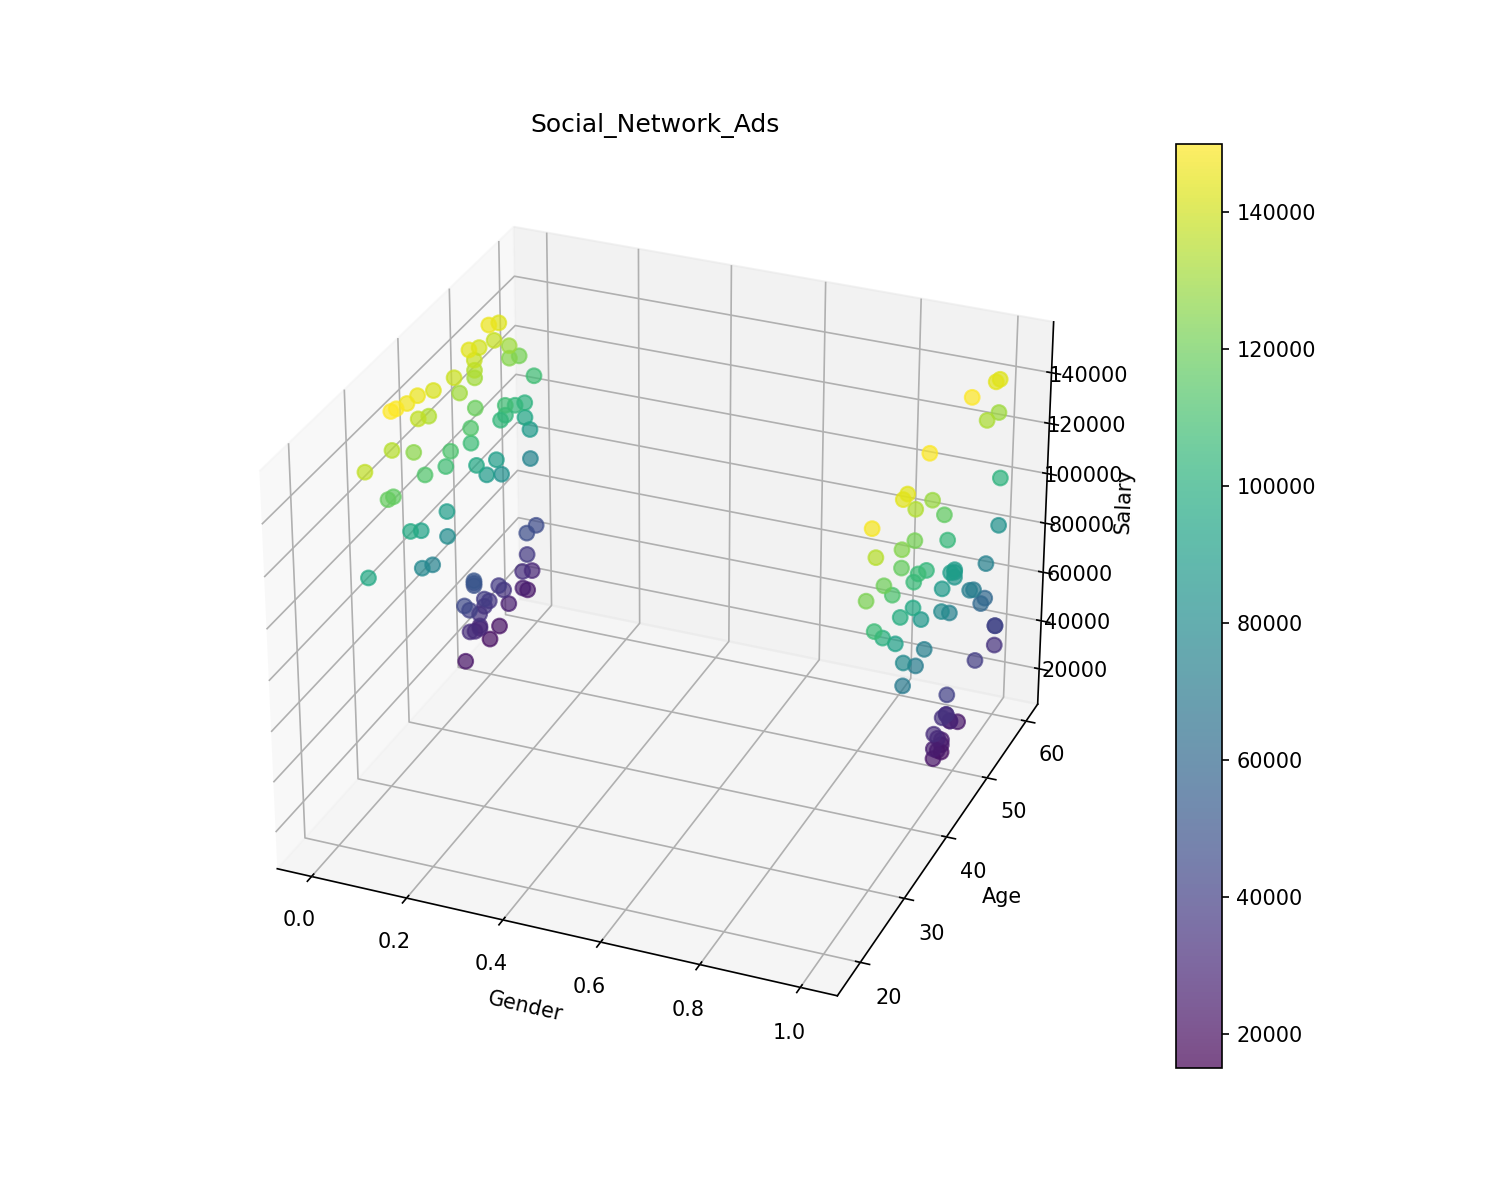

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


path='C:\\Users\\chand\\Downloads\\Data\\Data\\Social_Network_Ads.csv'
data=pd.read_csv(path)
print(data.info())

lr=LabelEncoder()
data['Gender']=lr.fit_transform(data['Gender'])
print(data.info())

inp=data.drop(['User ID','Purchased'],'columns')
out=data['Purchased']
print()


x_train,x_test,y_train,y_test=train_test_split(inp,out,random_state=21,train_size=0.8)

std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.fit_transform(x_test)

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(y_pred)
print(y_test)

acc=accuracy_score(y_pred,y_test)*100
print('Predicted Accuracy:',acc)

%matplotlib notebook
plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
fg=ax.scatter3D(data['Gender'],data['Age'],data['EstimatedSalary'],
               s=data['Purchased']*50,c=data['EstimatedSalary'],alpha=0.7)
plt.title('Social_Network_Ads')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Salary')
plt.colorbar(fg)

### Logistic Regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes
None
    age
12   27
24   50
14   49
13   29
20   21
3    52
25   54
6    55
19   18
10   18
23   45
26   23
8    62
22   40
16   25
17   58
0    22
15   55
4    46
9    61
    age
7    60
5    56
18   19
21   26
11   28
1    25
2    47
    bought_insurance
12                 0
24                 1
14                 1
13                 0
20                 0
3                  0
25                 1
6                  0
19                 0
10                 0
23                 1
26                 0
8                  1
22                 1
16                 1
17                 1
0                  0
15                 1
4                  1
9                 

C:\Users\chand\AppData\Local\Temp\ipykernel_16056\30664311.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inp=data.drop('bought_insurance','columns')
C:\Users\chand\AppData\Local\Temp\ipykernel_16056\30664311.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  out=data.drop('age','columns')
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


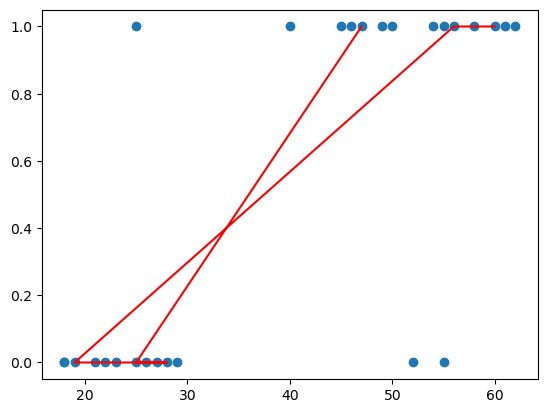

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

path='C:\\Users\\chand\\Downloads\\Data\\Data\\insurance_data.csv'
data=pd.read_csv(path)
print(data.info())

inp=data.drop('bought_insurance','columns')
out=data.drop('age','columns')
#print(inp)

x_train,x_test,y_train,y_test=train_test_split(inp,out,random_state=10,train_size=0.75)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

acc=accuracy_score(y_pred,y_test)*100
print('Predicted Accuracy:',acc)

import matplotlib.pyplot as plt
plt.scatter(inp,out)
plt.plot(x_test,y_pred,c='red')
plt.show()